In [1]:
# imports
import sqlite3
import pandas as pd

In [2]:
# load data
conn = sqlite3.connect('playerdata.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT * FROM Country")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
country_data = pd.DataFrame(rows, columns=columns)

cursor.execute("SELECT * FROM League")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
league_data = pd.DataFrame(rows, columns=columns)

cursor.execute("SELECT * FROM Match")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
match_data = pd.DataFrame(rows, columns=columns)

cursor.execute("SELECT * FROM Player")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
player_data = pd.DataFrame(rows, columns=columns)

cursor.execute("SELECT * FROM Player_Attributes")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
player_attribute_data = pd.DataFrame(rows, columns=columns)

cursor.execute("SELECT * FROM Team")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
team_data = pd.DataFrame(rows, columns=columns)

cursor.execute("SELECT * FROM Team_Attributes")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
team_attribute_data = pd.DataFrame(rows, columns=columns)

cursor.close()
conn.close()


In [3]:
player_data

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [4]:
player_data.dropna()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [5]:
all_player_data = pd.merge(player_data, player_attribute_data, on=['player_api_id', 'player_fifa_api_id'], how='inner')
all_player_data.drop(['id_x', 'id_y'], axis=1, inplace=True)
all_player_data['preferred_foot_encoded'] = all_player_data['preferred_foot'].map(lambda x: 1 if x == "right" else 0)

from datetime import datetime
from dateutil.relativedelta import relativedelta

all_player_data['birthday'] = pd.to_datetime(all_player_data['birthday'])
all_player_data['date'] = pd.to_datetime(all_player_data['date'])
all_player_data['age'] = all_player_data.apply(lambda row: relativedelta(row['date'], row['birthday']).years, axis=1)
all_player_data['gk_average'] = all_player_data.apply(lambda r: (r.gk_diving + r.gk_handling + r.gk_kicking + r.gk_positioning + r.gk_reflexes)/5, axis = 1)

all_player_data

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,age,gk_average
0,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,23,8.6
1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2015-11-19,67.0,71.0,right,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,23,8.6
2,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2015-09-21,62.0,66.0,right,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,23,8.6
3,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2015-03-20,61.0,65.0,right,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,23,7.6
4,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2007-02-22,61.0,65.0,right,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,14,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183761,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,2009-08-30,83.0,85.0,right,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1,27,30.6
183762,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,2009-02-22,78.0,80.0,right,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1,26,28.4
183763,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,2008-08-30,77.0,80.0,right,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1,26,28.4
183764,39902,Zvjezdan Misimovic,102359,1982-06-05,180.34,176,2007-08-30,78.0,81.0,right,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1,25,28.4


In [6]:
# load data
import json
import os

league_data_dir = os.getcwd() + '/data/leaguedata'
all_data = []
for filename in os.listdir(league_data_dir):
    if not filename.startswith("20"):
        continue
    league = "Premier League" if "PremierLeague" in filename else "La Liga" if "LaLiga" in filename else "Bundesliga" if "Bundesliga" in filename else "SerieA" if "SerieA" in filename else "Ligue1"
    year = 2017 if "2017" in filename else 2018 if "2018" in filename else 2019 if "2019" in filename else "2020"
    with open(os.path.join(league_data_dir, filename)) as f:
        for line in f:
            data = json.loads(line)
            merged_dict = {
                'name': data['name'] if 'name' in data else None, 
                'age': data['age'] if 'age' in data else None, 
                'nationality': data['nationality'] if 'nationality' in data else None,
                'height': data['height'] if 'height' in data else None,
                'weight': data['weight'] if 'weight' in data else None,
                'team': data['team'] if 'team' in data else None,
                'position': data['position'] if 'position' in data else None,
                'league': league,
                'year': year
            }
            
            merged_dict.update(data['general_stats'] if 'general_stats' in data else {})
            merged_dict.update(data['offensive_stats'] if 'offensive_stats' in data else {})
            merged_dict.update(data['passing_stats'] if 'passing_stats' in data else {})
            merged_dict.update(data['defensive_stats'] if 'defensive_stats' in data else {})
            all_data.append(merged_dict)
player_data = pd.DataFrame(all_data)

# drop rows with NaN (375 out of 6267)
player_data = player_data.dropna()
player_data


,name,age,nationality,height,weight,team,position,league,year,games,...,PPA,CrsPA,Prog,Tkl,TklW,Past,Press,Succ,Blocks,Int
0,Lukasz Piszczek,32,Poland,184.0,79.0,Borussia Dortmund,DF,Bundesliga,2017,24.0,...,27,12,119,42,24,26,308,99,45,29
1,Sven Bender,28,Germany,186.0,80.0,Bayer Leverkusen,DF,Bundesliga,2017,29.0,...,3,0,89,43,30,18,263,102,64,27
2,Lars Bender,28,Germany,185.0,81.0,Bayer Leverkusen,DF,Bundesliga,2017,21.0,...,19,6,103,57,31,29,371,102,37,15
3,Aaron Hunt,31,Germany,183.0,73.0,Hamburger SV,MF,Bundesliga,2017,29.0,...,31,5,97,30,22,32,484,135,30,14
4,Marcel Heller,31,Germany,175.0,70.0,Augsburg,FW,Bundesliga,2017,24.0,...,15,9,23,33,24,25,291,62,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,Giovani Lo Celso,22,Argentina,177.0,68.0,Real Betis,MF,La Liga,2018,32.0,...,47,2,124,55,46,32,500,137,36,10
6262,Jony,27,Spain,179.0,76.0,Alaves,MF,La Liga,2018,36.0,...,60,35,85,27,12,39,491,98,42,24
6263,Marc Cucurella,20,Spain,172.0,66.0,Eibar,MF,La Liga,2018,31.0,...,29,14,68,44,39,16,689,223,45,15
6264,Stanislav Lobotka,24,Slovakia,170.0,68.0,Celta Vigo,MF,La Liga,2018,31.0,...,12,1,106,42,34,35,670,151,23,26


In [7]:
all_player_data_by_pos = pd.merge(all_player_data, player_data[['name', 'position', 'league']], left_on = 'player_name', right_on = 'name')
all_player_data_by_pos


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,age,gk_average,name,position,league
0,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,7.0,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League
1,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,7.0,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League
2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,7.0,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League
3,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,7.0,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League
4,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-07,74.0,76.0,left,...,7.0,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74328,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2011-08-30,62.0,66.0,left,...,14.0,12.0,10.0,8.0,0,22,11.4,Zouhair Feddal,DF,La Liga
74329,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2011-08-30,62.0,66.0,left,...,14.0,12.0,10.0,8.0,0,22,11.4,Zouhair Feddal,DF,La Liga
74330,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2007-02-22,62.0,66.0,left,...,14.0,12.0,10.0,8.0,0,18,11.4,Zouhair Feddal,DF,La Liga
74331,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2007-02-22,62.0,66.0,left,...,14.0,12.0,10.0,8.0,0,18,11.4,Zouhair Feddal,DF,La Liga


In [10]:
gks = all_player_data_by_pos[all_player_data_by_pos.position == "GK"]
dfs = all_player_data_by_pos[all_player_data_by_pos.position == "DF"]
mfs = all_player_data_by_pos[all_player_data_by_pos.position == "MF"]
fws = all_player_data_by_pos[all_player_data_by_pos.position == "FW"]
list(gks.columns)


['player_api_id',
 'player_name',
 'player_fifa_api_id',
 'birthday',
 'height',
 'weight',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'preferred_foot_encoded',
 'age',
 'gk_average',
 'name',
 'position',
 'league']

In [20]:
# GoalKeeper Rating
gks['rating'] = gks['gk_diving'] + gks['gk_handling'] + gks['gk_kicking'] + gks['gk_positioning'] + gks['gk_reflexes'] + gks['potential']
min_value = gks['rating'].min()
max_value = gks['rating'].max()
gks['rating'] = ((gks['rating'] - min_value) / (max_value - min_value)) * 99
gks = gks.dropna()
gks['rating'] = gks['rating'].astype(int)
min_value = gks['rating'].min()
max_value = gks['rating'].max()
gks


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,age,gk_average,name,position,league,rating
1696,698273,Alban Lafont,231691,1999-01-23,193.04,170,2016-03-10,70.0,86.0,right,...,69.0,71.0,72.0,1,17,71.0,Alban Lafont,GK,SerieA,77
1697,698273,Alban Lafont,231691,1999-01-23,193.04,170,2016-03-10,70.0,86.0,right,...,69.0,71.0,72.0,1,17,71.0,Alban Lafont,GK,Ligue1,77
1698,698273,Alban Lafont,231691,1999-01-23,193.04,170,2016-03-10,70.0,86.0,right,...,69.0,71.0,72.0,1,17,71.0,Alban Lafont,GK,Ligue1,77
1699,698273,Alban Lafont,231691,1999-01-23,193.04,170,2016-03-10,70.0,86.0,right,...,69.0,71.0,72.0,1,17,71.0,Alban Lafont,GK,Ligue1,77
1700,698273,Alban Lafont,231691,1999-01-23,193.04,170,2016-01-28,67.0,83.0,right,...,68.0,69.0,68.0,1,17,69.2,Alban Lafont,GK,SerieA,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73302,41618,Yann Sommer,177683,1988-12-17,182.88,174,2008-08-30,60.0,70.0,right,...,57.0,58.0,66.0,1,19,60.4,Yann Sommer,GK,Bundesliga,62
73303,41618,Yann Sommer,177683,1988-12-17,182.88,174,2007-02-22,60.0,70.0,right,...,57.0,58.0,66.0,1,18,60.4,Yann Sommer,GK,Bundesliga,62
73304,41618,Yann Sommer,177683,1988-12-17,182.88,174,2007-02-22,60.0,70.0,right,...,57.0,58.0,66.0,1,18,60.4,Yann Sommer,GK,Bundesliga,62
73305,41618,Yann Sommer,177683,1988-12-17,182.88,174,2007-02-22,60.0,70.0,right,...,57.0,58.0,66.0,1,18,60.4,Yann Sommer,GK,Bundesliga,62


In [22]:
# Defender Rating
relevant_cols = ['heading_accuracy', 'long_passing', 'interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle']
dfs['rating'] = dfs[relevant_cols].mean(axis=1)

min_value = dfs['rating'].min()
max_value = dfs['rating'].max()
dfs['rating'] = ((dfs['rating'] - min_value) / (max_value - min_value)) * 99
dfs = dfs.dropna()
dfs['rating'] = dfs['rating'].astype(int)
min_value = dfs['rating'].min()
max_value = dfs['rating'].max()
dfs


<ipython-input-22-a352d834d110>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['rating'] = dfs[relevant_cols].mean(axis=1)
<ipython-input-22-a352d834d110>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['rating'] = ((dfs['rating'] - min_value) / (max_value - min_value)) * 99
<ipython-input-22-a352d834d110>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,age,gk_average,name,position,league,rating
0,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League,76
1,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League,76
2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League,76
3,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,...,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League,76
4,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,2016-04-07,74.0,76.0,left,...,9.0,9.0,12.0,0,26,10.2,Aaron Cresswell,DF,Premier League,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74328,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2011-08-30,62.0,66.0,left,...,12.0,10.0,8.0,0,22,11.4,Zouhair Feddal,DF,La Liga,58
74329,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2011-08-30,62.0,66.0,left,...,12.0,10.0,8.0,0,22,11.4,Zouhair Feddal,DF,La Liga,58
74330,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2007-02-22,62.0,66.0,left,...,12.0,10.0,8.0,0,18,11.4,Zouhair Feddal,DF,La Liga,58
74331,282473,Zouhair Feddal,205705,1989-01-01,190.50,172,2007-02-22,62.0,66.0,left,...,12.0,10.0,8.0,0,18,11.4,Zouhair Feddal,DF,La Liga,58


In [23]:
#midfielder
relevant_cols = ['short_passing', 'crossing', 'dribbling', 'long_passing', 'ball_control', 'vision', 'interceptions']
mfs['rating'] = mfs[relevant_cols].mean(axis=1)

min_value = mfs['rating'].min()
max_value = mfs['rating'].max()
mfs['rating'] = ((mfs['rating'] - min_value) / (max_value - min_value)) * 99
mfs = mfs.dropna()
mfs['rating'] = mfs['rating'].astype(int)
min_value = mfs['rating'].min()
max_value = mfs['rating'].max()
mfs


<ipython-input-23-e1531072816f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfs['rating'] = mfs[relevant_cols].mean(axis=1)
<ipython-input-23-e1531072816f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfs['rating'] = ((mfs['rating'] - min_value) / (max_value - min_value)) * 99


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,age,gk_average,name,position,league,rating
132,27316,Aaron Hunt,158138,1986-09-04,182.88,161,2016-04-28,77.0,77.0,left,...,7.0,16.0,15.0,0,29,13.0,Aaron Hunt,MF,Bundesliga,82
133,27316,Aaron Hunt,158138,1986-09-04,182.88,161,2016-02-25,77.0,77.0,left,...,7.0,16.0,15.0,0,29,13.0,Aaron Hunt,MF,Bundesliga,82
134,27316,Aaron Hunt,158138,1986-09-04,182.88,161,2015-09-25,77.0,77.0,left,...,7.0,16.0,15.0,0,29,13.0,Aaron Hunt,MF,Bundesliga,82
135,27316,Aaron Hunt,158138,1986-09-04,182.88,161,2015-09-21,77.0,77.0,left,...,7.0,16.0,15.0,0,29,13.0,Aaron Hunt,MF,Bundesliga,82
136,27316,Aaron Hunt,158138,1986-09-04,182.88,161,2015-09-04,77.0,77.0,left,...,6.0,15.0,14.0,0,29,12.0,Aaron Hunt,MF,Bundesliga,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74265,42860,Zlatko Junuzovic,173474,1987-09-26,172.72,152,2010-08-30,71.0,79.0,right,...,10.0,14.0,7.0,1,22,10.6,Zlatko Junuzovic,MF,Bundesliga,70
74266,42860,Zlatko Junuzovic,173474,1987-09-26,172.72,152,2009-08-30,66.0,82.0,right,...,51.0,23.0,23.0,1,21,25.4,Zlatko Junuzovic,MF,Bundesliga,63
74267,42860,Zlatko Junuzovic,173474,1987-09-26,172.72,152,2008-08-30,67.0,83.0,right,...,52.0,23.0,23.0,1,20,25.6,Zlatko Junuzovic,MF,Bundesliga,65
74268,42860,Zlatko Junuzovic,173474,1987-09-26,172.72,152,2007-08-30,70.0,83.0,right,...,52.0,23.0,23.0,1,19,25.6,Zlatko Junuzovic,MF,Bundesliga,61


In [24]:
#attacker
relevant_cols = ['crossing', 'finishing', 'heading_accuracy', 'volleys', 'curve', 'ball_control', 'shot_power', 'penalties', 'positioning']
fws['rating'] = fws[relevant_cols].mean(axis=1)

min_value = fws['rating'].min()
max_value = fws['rating'].max()
fws['rating'] = ((fws['rating'] - min_value) / (max_value - min_value)) * 99
fws = fws.dropna()
fws['rating'] = fws['rating'].astype(int)
fws


<ipython-input-24-c6ba8f40eebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fws['rating'] = fws[relevant_cols].mean(axis=1)
<ipython-input-24-c6ba8f40eebd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fws['rating'] = ((fws['rating'] - min_value) / (max_value - min_value)) * 99


,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot,...,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_encoded,age,gk_average,name,position,league,rating
498,210400,Abdoulaye Bamba,199313,1990-04-25,182.88,150,2016-04-28,69.0,71.0,right,...,8.0,7.0,8.0,1,26,10.0,Abdoulaye Bamba,FW,Ligue1,46
501,210400,Abdoulaye Bamba,199313,1990-04-25,182.88,150,2016-03-17,69.0,73.0,right,...,8.0,7.0,8.0,1,25,10.0,Abdoulaye Bamba,FW,Ligue1,46
504,210400,Abdoulaye Bamba,199313,1990-04-25,182.88,150,2015-09-21,69.0,73.0,right,...,8.0,7.0,8.0,1,25,10.0,Abdoulaye Bamba,FW,Ligue1,46
507,210400,Abdoulaye Bamba,199313,1990-04-25,182.88,150,2015-01-16,66.0,70.0,right,...,7.0,6.0,7.0,1,24,9.0,Abdoulaye Bamba,FW,Ligue1,44
510,210400,Abdoulaye Bamba,199313,1990-04-25,182.88,150,2014-09-18,66.0,72.0,right,...,7.0,6.0,7.0,1,24,9.0,Abdoulaye Bamba,FW,Ligue1,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74226,35724,Zlatan Ibrahimovic,41236,1981-10-03,195.58,209,2008-02-22,87.0,91.0,right,...,36.0,24.0,24.0,1,26,24.0,Zlatan Ibrahimovic,FW,SerieA,88
74227,35724,Zlatan Ibrahimovic,41236,1981-10-03,195.58,209,2007-08-30,87.0,91.0,right,...,36.0,24.0,24.0,1,25,24.0,Zlatan Ibrahimovic,FW,SerieA,88
74228,35724,Zlatan Ibrahimovic,41236,1981-10-03,195.58,209,2007-08-30,87.0,91.0,right,...,36.0,24.0,24.0,1,25,24.0,Zlatan Ibrahimovic,FW,SerieA,88
74229,35724,Zlatan Ibrahimovic,41236,1981-10-03,195.58,209,2007-02-22,87.0,91.0,right,...,36.0,8.0,6.0,1,25,13.6,Zlatan Ibrahimovic,FW,SerieA,88


# Run Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
independent_vars = ['age', 'height', 'weight', 'preferred_foot_encoded', 'sprint_speed', 'acceleration', 'jumping', 'stamina', 'strength']
dependent_variable = 'rating'

In [27]:
def rf(data, pos):
    X = data[independent_vars]
    y = data[dependent_variable]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a random forest model
    rf = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)

    # Calculate the prediction MSE
    mse = mean_squared_error(y_test, y_pred)
    print("Test Set MSE is: {}".format(mse))

    # Visualize the feature importance
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure()
    plt.title("Feature Importances random forest on {} for {}".format(dependent_variable, pos))
    plt.bar(range(X.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()


Test Set MSE is: 3.5189620758483033


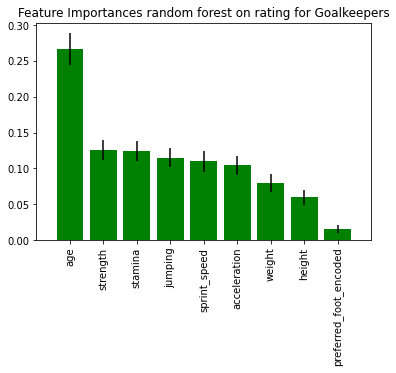

In [32]:
rf(gks, "Goalkeepers")

Test Set MSE is: 1.9898039215686274


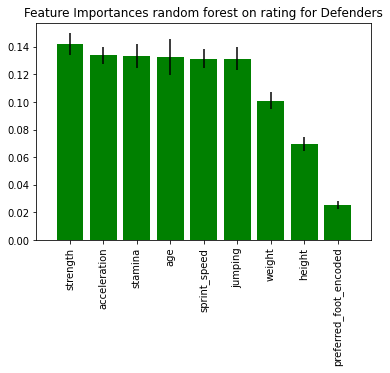

In [33]:
rf(dfs, "Defenders")

Test Set MSE is: 3.4975175837815473


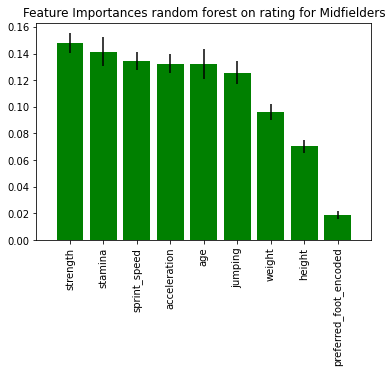

In [34]:
rf(mfs, "Midfielders")

Test Set MSE is: 1.3620246659815005


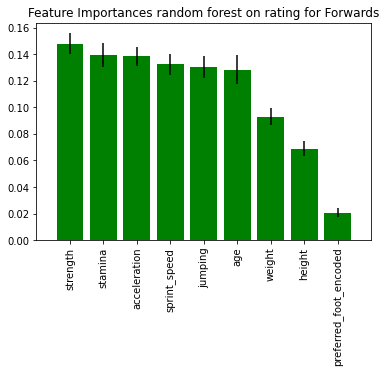

In [35]:
rf(fws, "Forwards")